In [1]:
import sys
sys.path.insert(0, '../src')
from frederickson import Frederickson
from modularmatrix import ModularMatrix
from integersolution import integer_solution
import numpy as np

In [2]:
base_distance_matrix=np.array([
   [  0.,  14.,  21.,  27.,  33.,  40.,  59.,  65.,  84.,  87.],
   [ 14.,   0.,  15.,  21.,  27.,  34.,  65.,  71.,  90.,  81.],
   [ 21.,  15.,   0.,  14.,  20.,  27.,  72.,  78.,  85.,  74.],
   [ 27.,  21.,  14.,   0.,  14.,  21.,  78.,  84.,  79.,  68.],
   [ 33.,  27.,  20.,  14.,   0.,  15.,  84.,  90.,  73.,  62.],
   [ 40.,  34.,  27.,  21.,  15.,   0.,  91.,  85.,  66.,  55.],
   [ 59.,  65.,  72.,  78.,  84.,  91.,   0.,  14.,  33.,  46.],
   [ 65.,  71.,  78.,  84.,  90.,  85.,  14.,   0.,  27.,  40.],
   [ 84.,  90.,  85.,  79.,  73.,  66.,  33.,  27.,   0.,  21.],
   [ 87.,  81.,  74.,  68.,  62.,  55.,  46.,  40.,  21.,   0.]])

# A single example

In [3]:
m = 3  # number of robots
p = 6  # number of floors/modules
modules_distance = [10]*p

In [4]:
# FREDERICKSON CALCULATION

distance_matrix = ModularMatrix(base_distance_matrix, modules_distance, number_of_modules=p)
fred = Frederickson(distance_matrix, m)
fred_tours = fred.calculate()

In [5]:
# INTEGER SOLUTION CALCULATION

int_tours = integer_solution(base_distance_matrix, m, p, modules_distance)

In [6]:
def max_length(tours, distance_matrix):
    max_tour = None
    max_value = 0
    for t in tours:
        t_length = distance_matrix.get_distance_along_path(t[0], t[-1], t)
        if t_length > max_value:
            max_value = t_length
            max_tour = t
    
    return (max_value, max_tour)

In [7]:
int_max_len, int_max_tour = max_length(int_tours, distance_matrix)

In [8]:
fred_max_len, fred_max_tour = max_length(fred_tours, distance_matrix)

In [9]:
print(int_max_len, fred_max_len)

596.0 1052.0


# Batch calculations for different scenarios

In [10]:
mp = [
    (2,2), (2,5), (2,10), (2,50),
    (5,5), (5,10), (5,20), (5,50),
    (20,20), (20,30), (20,50)
     ]

In [11]:
fred_tours_list = []
fred_max_len_list = []
fred_max_tour_list = []

int_tours_list = []
int_max_len_list = []
int_max_tour_list = []

for m, p in mp:
    print("Computing case m={}, p={}".format(m,p))
    modules_distance = [10]*p
    
    # FREDERICKSON CALCULATION

    distance_matrix = ModularMatrix(base_distance_matrix, modules_distance, number_of_modules=p)
    fred = Frederickson(distance_matrix, m)
    fred_tours = fred.calculate()
    fred_max_len, fred_max_tour = max_length(fred_tours, distance_matrix)
    
    print("Fred computed")
    
    # INTEGER SOLUTION CALCULATION

    int_tours = integer_solution(base_distance_matrix, m, p, modules_distance)
    int_max_len, int_max_tour = max_length(int_tours, distance_matrix)
    
    print("Int computed")
    
    # Save in the lists for later analysis
    fred_tours_list.append(fred_tours)
    fred_max_len_list.append(fred_max_len)
    fred_max_tour_list.append(fred_max_tour)
    int_tours_list.append(int_tours)
    int_max_len_list.append(int_max_len)
    int_max_tour_list.append(int_max_tour)

Computing case m=2, p=2
Fred computed
Int computed
Computing case m=2, p=5
Fred computed
Int computed
Computing case m=5, p=10
Fred computed
Int computed
Computing case m=2, p=50
Fred computed
Int computed
Computing case m=5, p=5
Fred computed
Int computed
Computing case m=5, p=10
Fred computed
Int computed
Computing case m=5, p=20
Fred computed
Int computed
Computing case m=5, p=50
Fred computed
Int computed
Computing case m=20, p=20
Fred computed
Int computed
Computing case m=20, p=30
Fred computed
Int computed
Computing case m=20, p=50
Fred computed
Int computed


In [12]:
fred_max_len_list

[476.0,
 1256.0,
 2590.0,
 13064.0,
 624.0,
 1164.0,
 2348.0,
 5950.0,
 1596.0,
 2390.0,
 3896.0]

In [13]:
int_max_len_list

[268.0,
 824.0,
 1420.0,
 7180.0,
 328.0,
 676.0,
 1372.0,
 3212.0,
 628.0,
 1076.0,
 1476.0]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

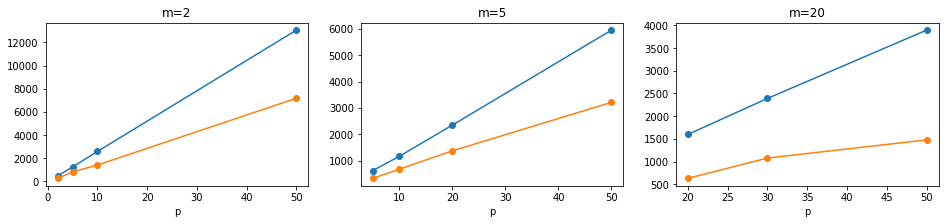

In [22]:
fig=plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
x=list(zip(*mp))[1][0:4]
plt.plot(x, fred_max_len_list[0:4], '-o')
plt.plot(x, int_max_len_list[0:4], '-o')
plt.xlabel("p")
plt.title("m=2")

plt.subplot(1,3,2)
x=list(zip(*mp))[1][4:8]
plt.plot(x, fred_max_len_list[4:8], '-o')
plt.plot(x, int_max_len_list[4:8], '-o')
plt.title("m=5")
plt.xlabel("p")

plt.subplot(1,3,3)
x=list(zip(*mp))[1][8:11]
plt.plot(x, fred_max_len_list[8:11], '-o')
plt.plot(x, int_max_len_list[8:11], '-o')
plt.title("m=20")
plt.xlabel("p")

plt.show()